# 9. Integration schemes

$\textbf{9.1 Exercise}$ 1D harmonic Oscillators: Symplectic vs.non-symplectic integrators. <br>
The Hamilton’s equations of motion are:

$$
\begin{equation}
\begin{cases}
\dot{p} = -\frac{\partial H}{\partial x} = -kx  \quad\quad\quad\quad\quad\quad\quad \text{(1.1)}\\
\dot{x} = \frac{\partial H}{\partial p} = \frac{p}{m},
\end{cases}
\end{equation}
$$

where the Hamiltonian is given by
$
\begin{equation}
H = \frac{p^2}{2m} + \frac{kx^2}{2}.
\end{equation}
$
For convenience, set $k = m = 1$. The first integrator (Euler integrator) considered is:

$$
\begin{equation}
\begin{cases}
p(t + \Delta t) = p(t) - x(t)\Delta t, \quad\quad\quad\quad \text{(1.2)} \\
x(t + \Delta t) = x(t) + p(t)\Delta t.
\end{cases}
\end{equation}
$$

The second integrator (Euler symplectic) is also first order and reads:

$$
\begin{equation}
\begin{cases}
p(t + \Delta t) &= p(t) - x(t)\Delta t, \quad\quad\quad\quad \text{(1.3)} \\
x(t + \Delta t) &= x(t) + p(t + \Delta t)\Delta t.
\end{cases}
\end{equation}
$$

$\textbf{a)}$ Express Eqs. (1.2) and (1.3) in matrix form and show that for Eq. (1.2) $det(M) > 1$ while for Eq. (1.3) $det(M) = 1$. What does this tells us about the two algorithms and why?

$$ (1.2) \longrightarrow
\begin{equation}
\begin{bmatrix}
    x \\
    p
\end{bmatrix}_{(t + \Delta t)}
=
\begin{bmatrix}
    1 & \Delta t \\
    -\Delta t & 1
\end{bmatrix}
\begin{bmatrix}
    x \\
    p
\end{bmatrix}_t,
\end{equation}
$$

The determinant of this matrix is $det(M) = 1 + \Delta t^2 > 1 $.

$$ (1.3) \longrightarrow
\begin{equation}
\begin{bmatrix}
    x \\
    p
\end{bmatrix}_{(t + \Delta t)}
=
\begin{bmatrix}
    1-\Delta t^2 & \Delta t \\
    -\Delta t & 1
\end{bmatrix}
\begin{bmatrix}
    x \\
    p
\end{bmatrix}_t.
\end{equation}
$$

The determinant of this matrix is $det(M) = 1 - \Delta t^2 + \Delta t^2 = 1 $.


The relation between $det(M)$ and volume-preserving or volume-expanding properties is a general result related to linear transformations and their effect on volumes in phase space. In fact if we consider a linear transformation represented by a matrix $M$ that transforms a vector $v$ to a new vector $Mv$, the determinant gives the factor by which volumes are scaled under this transformation. For this reason we can state that:
- the determinant being greather than 1 means that the algorithm is volume-expanding, and the phase space volumes will generally grow over time;
- the determinant being equal to 1 indicates that the algorithm doesn't cause significant volume distortion, which can also be advantageous in preserving the symplectic structure of the system.

$\textbf{b)}$ Show analytically that the symplectic integrator defined by Eq. (1.3) has the following constant of motion (shadow Hamiltonian):
$$ H' = H - \frac{px}{2}\Delta t $$

Now, let us compute the change in the Hamiltonian $H$ and see if it matches the form $H' = H - \frac{px}{2}\Delta t$:

$$
\begin{align*}
H' &= (\frac{p^2}{2} + \frac{x^2}{2})  \\
&= \frac{p(t + \Delta t)^2}{2} + \frac{x(t + \Delta t)^2}{2} \\
&= \frac{p(t)^2 - 2 p(t)x(t)\Delta t + {x(t)^2\Delta t^2}}{2} + \frac{x(t)^2(1-\Delta t^2)^2 + p(t)^2\Delta t^2 + x(t)p(t)\Delta t(1-\Delta t)}{2} \\
&= \frac{p(t)^2 - 2 p(t)x(t)\Delta t}{2} + \frac{x(t)^2 + x(t)p(t)\Delta t}{2} \\
&= \frac{p(t)^2}{2} + \frac{x(t)^2}{2}- \frac{2 p(t)x(t)\Delta t}{2} + \frac{x(t)p(t)\Delta t}{2} \\
&= H - \frac{xp}{2}\Delta t \\
\end{align*}
$$

which is what we want to prove.

$\textbf{c)}$ Take $\Delta t = 10^{−3}$ and $\Delta t = 10^{−2}$ with initial conditions $x(0) = 1$, $p(0) = 0$ and plot the solutions of Eqs. (1.2) and (1.3) up to time $T = 10$. Compare the relative errors of the two integration schemes to the exact solution of Eq. $(1.1)$. Which of the two integrators is more accurate?

Let us find out the exact solution. The equation (1.1) if $m=1$, $k=1$ is given by:

$$
\dot{p} = \ddot{x} = - x
$$

To solve it analytically, one can guess a solution in the form of $(x(t) = A \cos(\omega t + \phi) $, where $A$ is a constant to be determined, and $\omega$ is the angular frequency. The initial conditions are:

$$
\begin{equation}
\begin{cases}
x(t=0) = 1\\
\dot{x}(t=0) = 0.
\end{cases}
\end{equation}
$$

Taking derivatives:

$$
\begin{equation}
\begin{cases}
\dot{x}(t) = -A \omega \sin(\omega t+\phi) \\
\ddot{x}(t) = -A \omega^2 \cos(\omega t+\phi)
\end{cases}
\end{equation}
$$


Now, substitute these derivatives into the differential equation $\ddot{x} = - x$:

$$-A \omega^2 \cos(\omega t+\phi) = -A \cos(\omega t+\phi) $$

For $t=0$ we obtain $-A\omega^2 = -A$, that leads to $\omega = 1$. Now from the initial conditions ($t=0$, $\omega=1$):

$$
\begin{equation}
\begin{cases}
x(t=0) = A cos(\phi) = 1 \\
\dot{x}(t=0) = -A \sin(\phi) = 0
\end{cases}
\begin{cases}
A = 1 \\
\phi = 0
\end{cases}
\end{equation}
$$

Therefore, the solution to the initial problem is $x(t) = cos(t)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def euler(T, init, dt):
    '''
    T = time of the simulation
    init = 1d array for the initial conditions (x(t=0),y(t=0))
    dt = time-step
    '''
    
    Tstep = np.arange(0,T,dt).shape[0]
    x, p, t = np.zeros(Tstep+1), np.zeros(Tstep+1), np.zeros(Tstep+1)
    x[0], p[0] = init

    for n in range(Tstep):
        x[n+1] = x[n] + p[n]*dt
        p[n+1] = p[n] - x[n]*dt
        t[n+1] = t[n] + dt

    return (x, p, t)


def euler_sympl(T, init, dt):
    '''
    T = time of the simulation
    init = 1d array for the initial conditions (x(t=0),y(t=0))
    dt = time-step
    '''
    
    Tstep = np.arange(0,T,dt).shape[0]
    x, p, t = np.zeros(Tstep+1), np.zeros(Tstep+1), np.zeros(Tstep+1)
    x[0], p[0] = init

    for n in range(Tstep):
        p[n+1] = p[n] - x[n]*dt
        x[n+1] = x[n] + p[n+1]*dt
        t[n+1] = t[n] + dt
        
    return (x, p, t)

In [24]:
# Define the parameters for the simulation
T = 10
init = np.array([1,0])
dt_values = [1e-2, 1e-3]

#x_euler, p_euler, t = euler(T, init, dt)
#x_euler_sympl, p_euler_sympl, t = euler_sympl(T, init, dt)
#x_analytical  = np.cos(t)

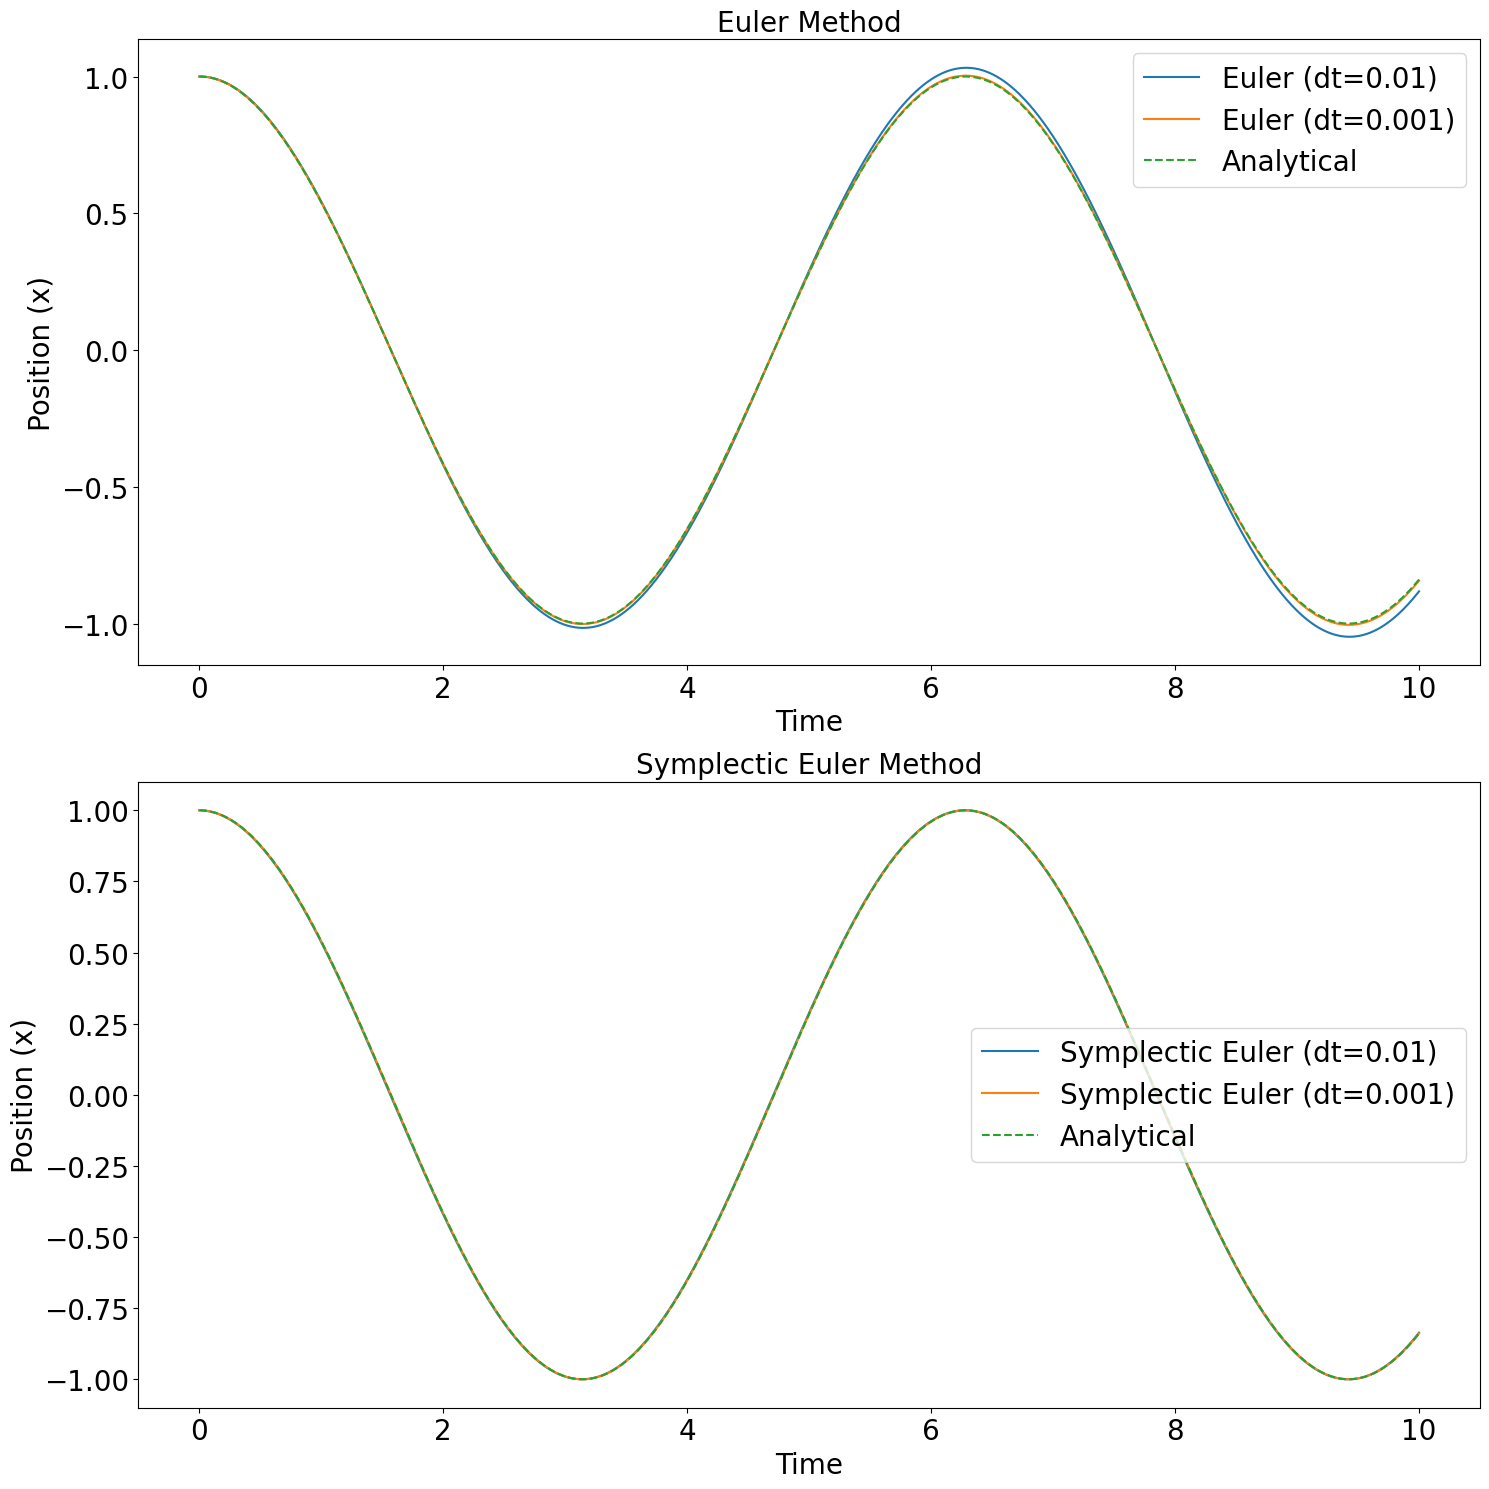

In [25]:
plt.figure(figsize=(15, 15))

for dt in dt_values:
    # Run simulations for Euler and symplectic Euler methods
    x_euler, _, t = euler(T, init, dt)
    x_euler_sympl, _, _ = euler_sympl(T, init, dt)
    x_analytical  = np.cos(t)
    
    # Plot Euler method
    plt.subplot(2, 1, 1)
    plt.plot(t, x_euler, label=f'Euler (dt={dt})')
    plt.xlabel('Time',fontsize=20)
    plt.ylabel('Position (x)',fontsize=20)

    # Plot symplectic Euler method
    plt.subplot(2, 1, 2)
    plt.plot(t, x_euler_sympl, label=f'Symplectic Euler (dt={dt})')
    plt.xlabel('Time',fontsize=20)
    plt.ylabel('Position (x)',fontsize=20)

plt.subplot(2, 1, 1)
plt.plot(t, x_analytical, label='Analytical', linestyle='--')
plt.title('Euler Method', fontsize=20)
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)

plt.subplot(2, 1, 2)
plt.plot(t, x_analytical, label='Analytical', linestyle='--')
plt.title('Symplectic Euler Method',fontsize=20)
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)

plt.tight_layout()
plt.show()

##### Zoom in

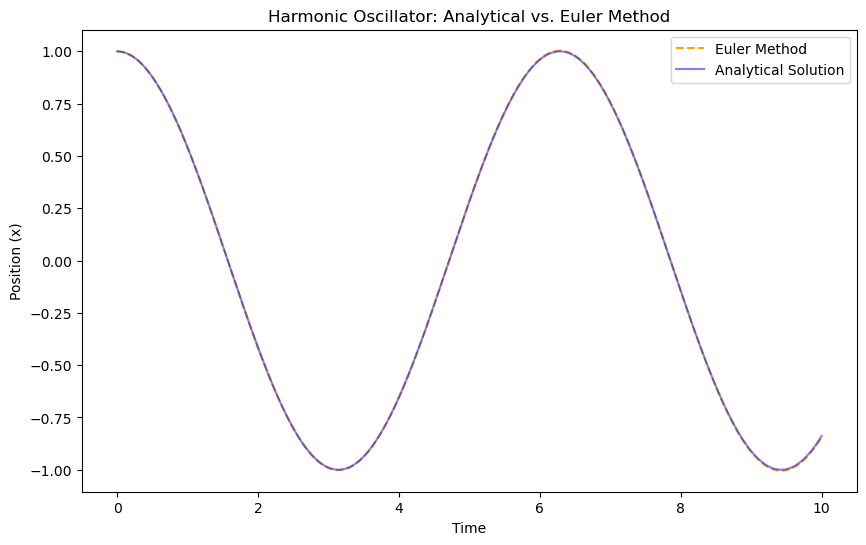

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(t, x_euler, label='Euler Method', linestyle='--', color='orange')
plt.plot(t, x_analytical, label='Analytical Solution', color='blue', alpha = 0.5)
plt.title('Harmonic Oscillator: Analytical vs. Euler Method')
plt.xlabel('Time')
plt.ylabel('Position (x)')
plt.legend()
plt.show()

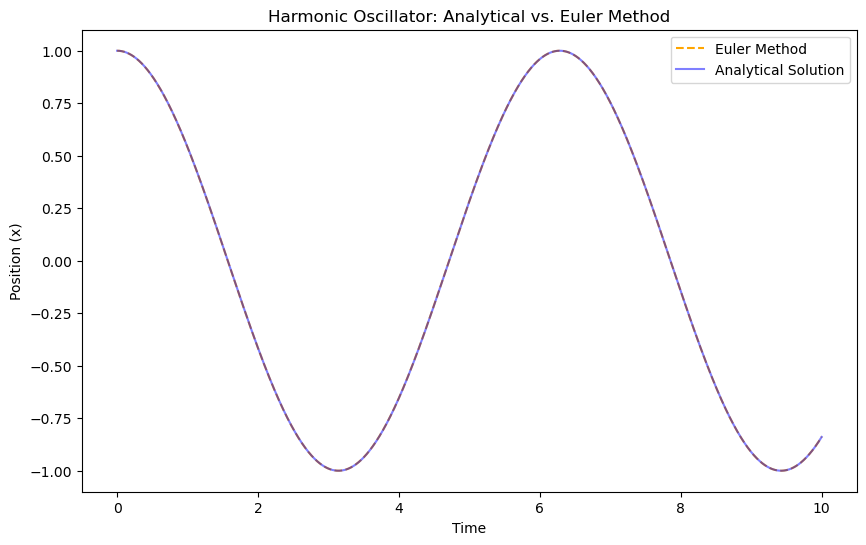

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(t, x_euler_sympl, label='Euler Method', linestyle='--', color='orange')
plt.plot(t, x_analytical, label='Analytical Solution', color='blue', alpha = 0.5)
plt.title('Harmonic Oscillator: Analytical vs. Euler Method')
plt.xlabel('Time')
plt.ylabel('Position (x)')
plt.legend()
plt.show()

##### Longer simulation

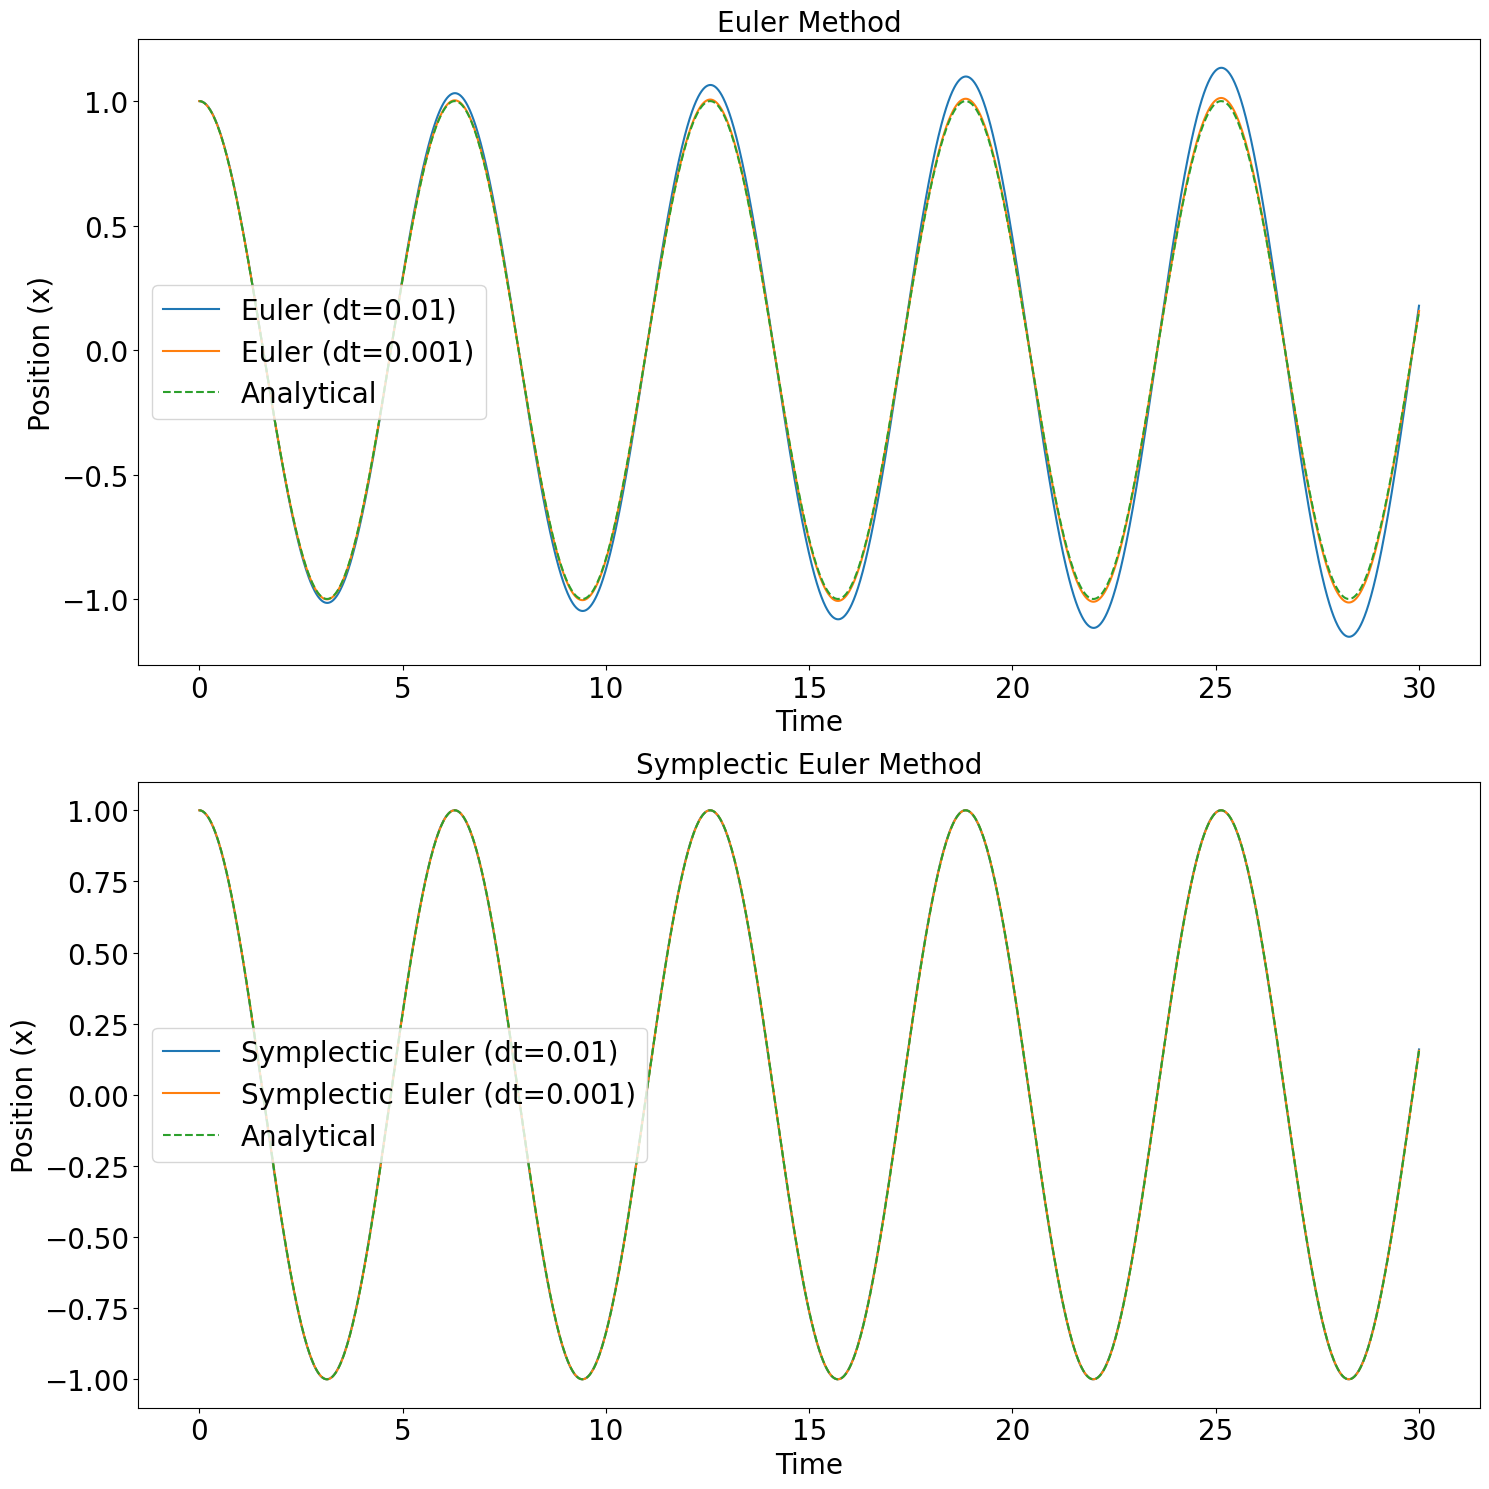

In [28]:
# Define the parameters for the simulation
T = 30
init = np.array([1,0])
dt_values = [1e-2, 1e-3]


plt.figure(figsize=(15, 15))
for dt in dt_values:
    # Run simulations for Euler and symplectic Euler methods
    x_euler, _, t = euler(T, init, dt)
    x_euler_sympl, _, _ = euler_sympl(T, init, dt)
    x_analytical  = np.cos(t)
    
    # Plot Euler method
    plt.subplot(2, 1, 1)
    plt.plot(t, x_euler, label=f'Euler (dt={dt})')
    plt.xlabel('Time',fontsize=20)
    plt.ylabel('Position (x)',fontsize=20)

    # Plot symplectic Euler method
    plt.subplot(2, 1, 2)
    plt.plot(t, x_euler_sympl, label=f'Symplectic Euler (dt={dt})')
    plt.xlabel('Time',fontsize=20)
    plt.ylabel('Position (x)',fontsize=20)

plt.subplot(2, 1, 1)
plt.plot(t, x_analytical, label='Analytical', linestyle='--')
plt.title('Euler Method', fontsize=20)
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)

plt.subplot(2, 1, 2)
plt.plot(t, x_analytical, label='Analytical', linestyle='--')
plt.title('Symplectic Euler Method',fontsize=20)
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)

plt.tight_layout()
plt.show()

To compare the relative errors of the two integration schemes to the exact solution of Eq. $(1.1)$ I used this formula: 

$$
\text{Relative error} = \Sigma_{x} \frac{\left| x_{numeric} - x_{analytic} \right|}{\left| x_{analytic} \right|}
$$

Where:
- $x_{numeric}$ is the solution of the equation, obtained using Euler method or Symplectic Euler method;<br>
- $x_{analytic}$ is the exact or analytical result.


In [31]:
def get_relative_error(x_numeric, x_analytical):
    absolute_error = abs(x_numeric - x_analytical)
    relative_error =sum(absolute_error / abs(x_analytical))/len(x_analytical)
    return relative_error

T = 10

for dt in dt_values:
    # Run simulations for Euler and symplectic Euler methods
    x_euler, _, t = euler(T, init, dt)
    x_euler_sympl, _, _ = euler_sympl(T, init, dt)
    x_analytical  = np.cos(t)
    
    print('dt = ', dt,'\n')
    
    relative_error = get_relative_error(x_euler, x_analytical)
    print(f"The relative error with Euler is: {relative_error}")
    
    relative_error = get_relative_error(x_euler_sympl, x_analytical)
    print(f"The relative error with symplectic Euler is: {relative_error}\n")


dt =  0.01 

The relative error with Euler is: 0.025561785904983876
The relative error with symplectic Euler is: 0.025628162257573823

dt =  0.001 

The relative error with Euler is: 0.0025179078418818565
The relative error with symplectic Euler is: 0.005379141816680548



In [32]:
T = 100

for dt in dt_values:
    # Run simulations for Euler and symplectic Euler methods
    x_euler, _, t = euler(T, init, dt)
    x_euler_sympl, _, _ = euler_sympl(T, init, dt)
    x_analytical  = np.cos(t)
    
    print('dt = ', dt,'\n')
    
    relative_error = get_relative_error(x_euler, x_analytical)
    print(f"The relative error with Euler is: {relative_error}")
    
    relative_error = get_relative_error(x_euler_sympl, x_analytical)
    print(f"The relative error with symplectic Euler is: {relative_error}\n")


dt =  0.01 

The relative error with Euler is: 0.30556972114119807
The relative error with symplectic Euler is: 0.03617531785332251

dt =  0.001 

The relative error with Euler is: 0.02547348719658574
The relative error with symplectic Euler is: 0.0040405055858781245



$\textbf{d)}$ For the same values of the parameters given above plot the value of $H$ as a function of $t$ up to
time $T = 10$. Plot $H'$ as well for the symplectic integrator. Which of the two integrators has a
long time drift in the energy estimate?


                               Running with dt =  0.01 



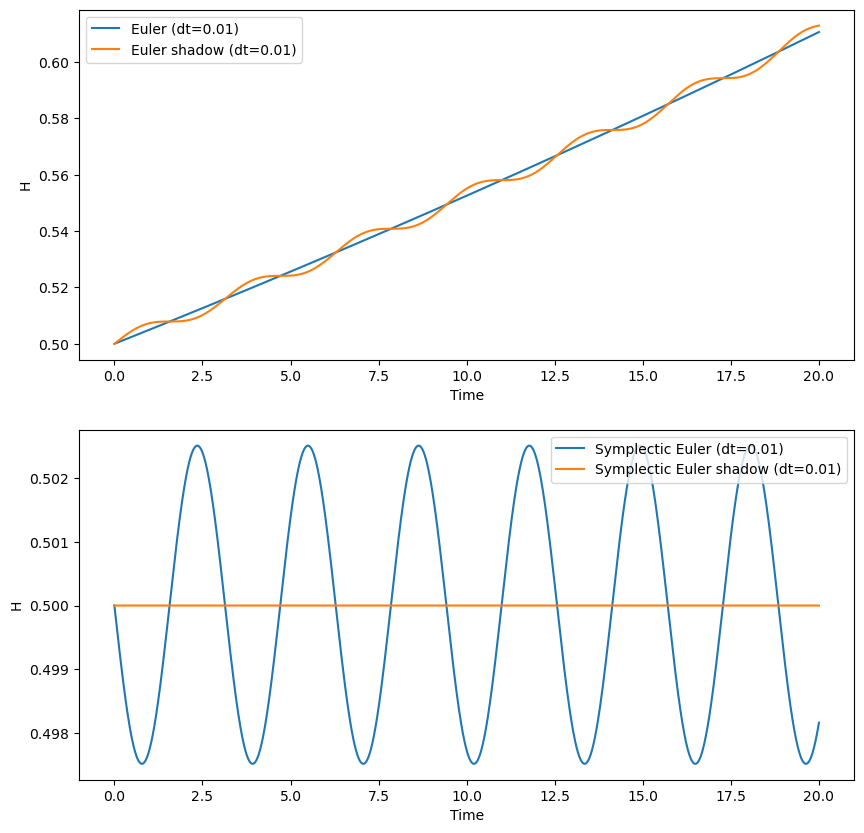


                               Running with dt =  0.001 



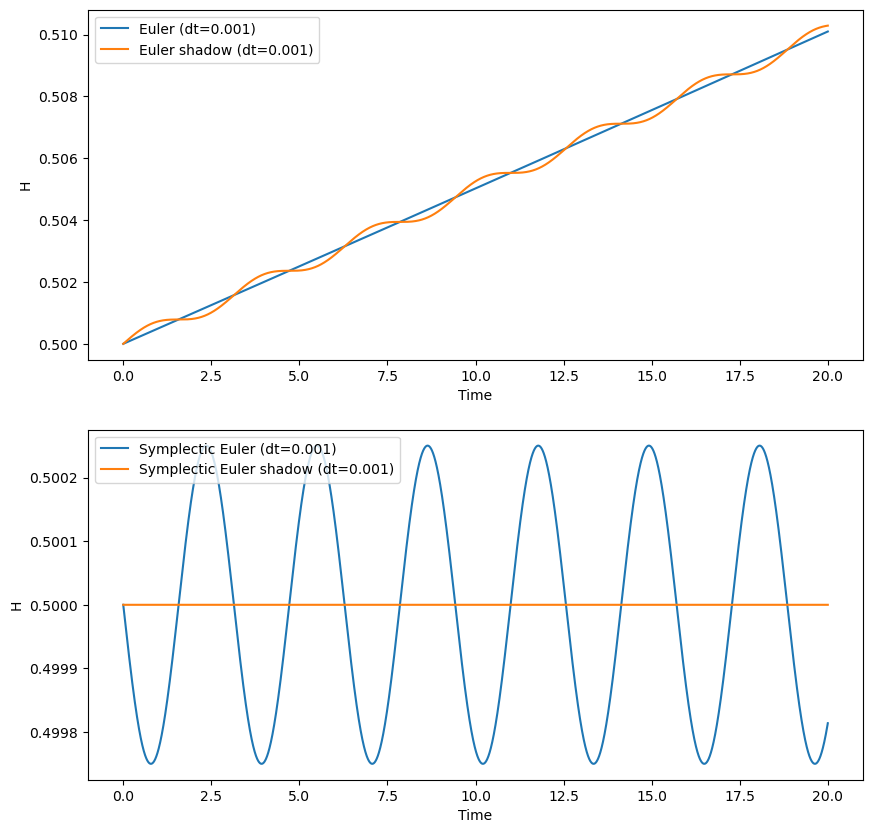

<Figure size 640x480 with 0 Axes>

In [39]:
# Define the parameters for the simulation
m, k = 1,1
T = 20
init = np.array([1,0])
dt_values = [1e-2, 1e-3]

def get_H(p, x, m, k):
    return p**2/(2*m) + (k*x**2)/(2)

def get_Hp(p, x, m, k, dt):
    return p**2/(2*m) + (k*x**2)/(2) - dt*p*x/2

# Define the title specifications
text = "Running with dt = "
text_length = len(text)
padding = (80 - text_length) // 2

for dt in dt_values:
    print("\n" + " " * padding + "\033[1m" + "Running with dt = ", dt, "\033[0m" + "\n")    # Run simulations for Euler and symplectic Euler methods
    x_euler, p_euler, t = euler(T, init, dt)
    x_euler_sympl, p_euler_sympl, _ = euler_sympl(T, init, dt)
    
    # Compute the H and H' as a function of t for the 2 methods
    T_tot = x_euler.shape[0]
    H_euler, Hp_euler = np.zeros(T_tot), np.zeros(T_tot)
    H_euler_sympl, Hp_euler_sympl = np.zeros(T_tot), np.zeros(T_tot)
    
    #for n in range(T_tot):
    #    H_euler[n] = get_H(p_euler, x_euler, m, k)
    #    Hp_euler[n] = get_Hp(p_euler, x_euler, m, k, dt)
    #    H_euler_sympl[n] = get_H(p_euler_sympl, x_euler_sympl, m, k)
    #    Hp_euler_sympl[n] = get_Hp(p_euler_sympl, x_euler_sympl, m, k, dt)
    
    H_euler = get_H(p_euler, x_euler, m, k)
    Hp_euler = get_Hp(p_euler, x_euler, m, k, dt)
    H_euler_sympl = get_H(p_euler_sympl, x_euler_sympl, m, k)
    Hp_euler_sympl = get_Hp(p_euler_sympl, x_euler_sympl, m, k, dt)
    
    # Plot Euler method
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 1, 1)
    plt.plot(t, H_euler, label=f'Euler (dt={dt})')
    plt.plot(t, Hp_euler, label=f'Euler shadow (dt={dt})')
    plt.xlabel('Time')
    plt.ylabel('H')
    plt.legend()

    # Plot symplectic Euler method
    plt.subplot(2, 1, 2)
    plt.plot(t, H_euler_sympl, label=f'Symplectic Euler (dt={dt})')
    plt.plot(t, Hp_euler_sympl, label=f'Symplectic Euler shadow (dt={dt})')
    plt.xlabel('Time')
    plt.ylabel('H')
    plt.legend()
    plt.show()
    
plt.tight_layout()
plt.show()

$\textbf{9.2 Exercise: Algorithms}$ Implement the Velocity Verlet algorithm and another one between: 
- i) Verlet algorithm 
- ii) Beeman algorithm 
- iii) Predictor-corrector algorithm.

#### Velocity Verlet Algorithm for 1D Harmonic Oscillator

1. **Procedure VelVerlet**($r_0, v_0, T, dt$):
   - Set $m$ to 1.0
   - Initialize arrays: $r[0], v[0]$
   - Set $r[0] \gets r_0, v[0] \gets v_0$

2. **For** $n \gets 0$ **to** $T-1$:
   - $f_{\text{curr}} \gets f(r[n], v[n])$ 
   - $r[n+1] \gets r[n] + v[n] \cdot dt + \frac{f_{\text{curr}}}{2 \cdot m} \cdot dt^2$ 
   - $v_{\text{partial}} \gets v[n] + \frac{f_{\text{curr}}}{2 \cdot m} \cdot dt$ 
   - $f_{\text{next}} \gets f(r[n+1], v_{\text{partial}})$ 
   - $v[n+1] \gets v_{\text{partial}} + \frac{f_{\text{next}}}{2 \cdot m} \cdot dt$ 
3. **Return** $(r, v)$


#### Beeman Algorithm for 1D Harmonic Oscillator

1. **Procedure Beeman**($r_0, v_0, T, dt$):
   - Set $m$ to 1.0 
   - Initialize arrays: $r[0], v[0]$
   - Set $r[0] \gets r_0, v[0] \gets v_0$

2. **For** $n \gets 1$ **to** $T$:
   - **If** $n == 1$:
     - $r[n-1] \gets r[n] - v[n] \cdot dt + \frac{1}{4} \cdot f(r[n]) \cdot dt^2$
   - $r[n+1] \gets r[n] + v[n] \cdot dt + \frac{4 \cdot f(r[n]) - f(r[n-1])}{6 \cdot m} \cdot dt^2$
   - $v[n+1] \gets v[n] + \frac{2 \cdot f(r[n+1]) + 5 \cdot f(r[n]) - f(r[n-1])}{6 \cdot m} \cdot dt$


In [95]:
def get_f(r,k):
    return -k*r # harmonic oscillator k = 1

def get_E(r,v,m,k):
    return 0.5*m*v**2 + 0.5*k*r**2 # harmonic oscillator k = 1

def vel_verlet(r0, v0, T, dt):
    r, v = np.zeros(T+1), np.zeros(T+1)
    r[0], v[0] = r0, v0
    
    for n in range(T):
        f_curr = get_f(r[n],k)                       # f(n)
        r[n+1] = r[n] + v[n]*dt + f_curr/(2*m)*dt**2 # >> r(n+1)
        v_partial = v[n] + f_curr/(2*m)*dt           # 1/2 kick 
        f_next =   get_f(r[n+1], k)                  # f(n+1)
        v[n+1] = v_partial + f_next/(2*m)*dt         # >> v(n+1) 
        
    return (r, v)


def beeman(r0, v0, T, dt):
    r, v = np.zeros(T+1), np.zeros(T+1)
    r[0], v[0] = r0, v0

    for n in range(0,T):
        if n == 0: r[n-1] = r[n] - v[n] * dt + get_f(r[n],k)/4 * dt**2
        #print(n, r[n])
        r[n+1] = r[n] + v[n] * dt + (4*get_f(r[n],k) - get_f(r[n-1],k))/(6*m)*dt**2
        v[n+1] = v[n] + (2*get_f(r[n+1],k)+5*get_f(r[n],k)-get_f(r[n-1],k))/(6*m)*dt

    return (r, v) 


$\textbf{9.3 Exercise: The harmonic oscillator #2}$

$$\begin{array}{rcl}\dfrac{dq}{dt}&=&p,\\\dfrac{dp}{dt}&=&-\omega^2q.\end{array}$$

The exact solution of $p(t)$ vs $\omega q(t)$ we get a circular orbit in phase that rotates by an amount of $\omega\Delta t$ at every time step. Considering this system, compare the two algorithms implemented above in terms of <br>
      i) energy conservation, plotting $(E(t)-E_0)/E_0$ vs $t,E_0$ being the initial total energy <br>
      ii) discrepancy with the analytical solution as a function of time. Verify that the Velocity Verlet is stable (i.e. it follows the analytical solution) for $\omega\Delta t<2.$<br>

##### Beeman

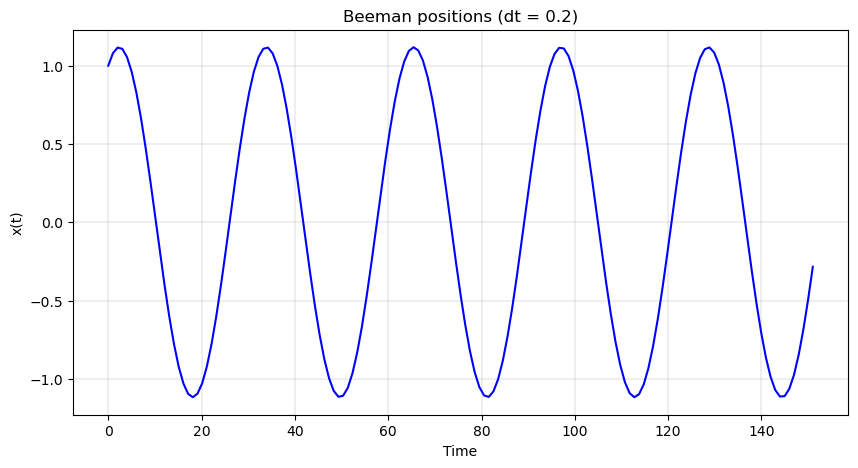

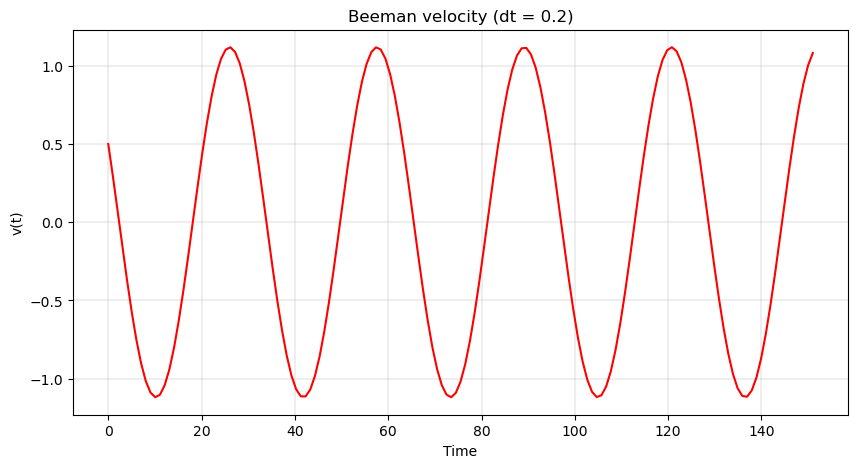

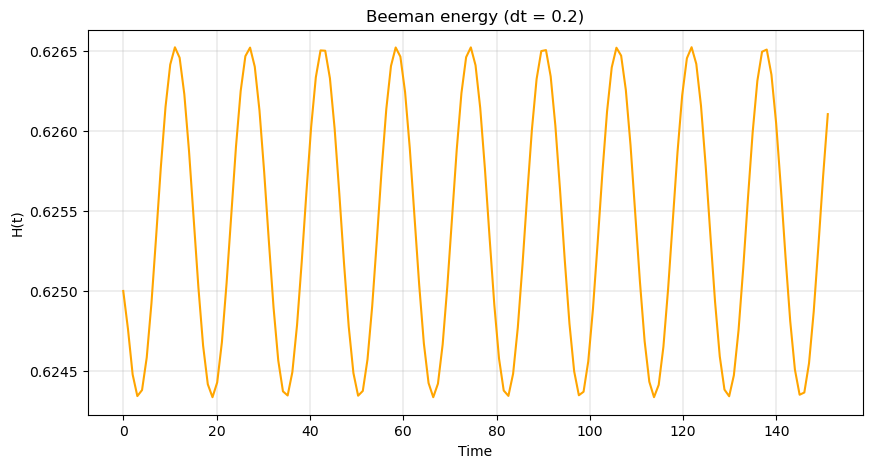

In [80]:
T = 150
r, v = beeman(1, 0.5, T, 0.2)

# Plot Beeman positions
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0,T+1,T+1), r, color = 'blue')
plt.title('Beeman positions (dt = 0.2)')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.grid(linewidth = 0.3)
plt.show()


# Plot Beeman velocity
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0,T+1,T+1), v, color = 'red')
plt.title('Beeman velocity (dt = 0.2)')
plt.xlabel('Time')
plt.ylabel('v(t)')
plt.grid(linewidth = 0.3)
plt.show()
    
    
E_beeman = get_E(r,v,m=1,k=1)
# Plot Beeman energy
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0,T+1,T+1), E_beeman, color = 'orange')
plt.title('Beeman energy (dt = 0.2)')
plt.xlabel('Time')
plt.ylabel('H(t)')
plt.grid(linewidth = 0.3)
plt.show()    

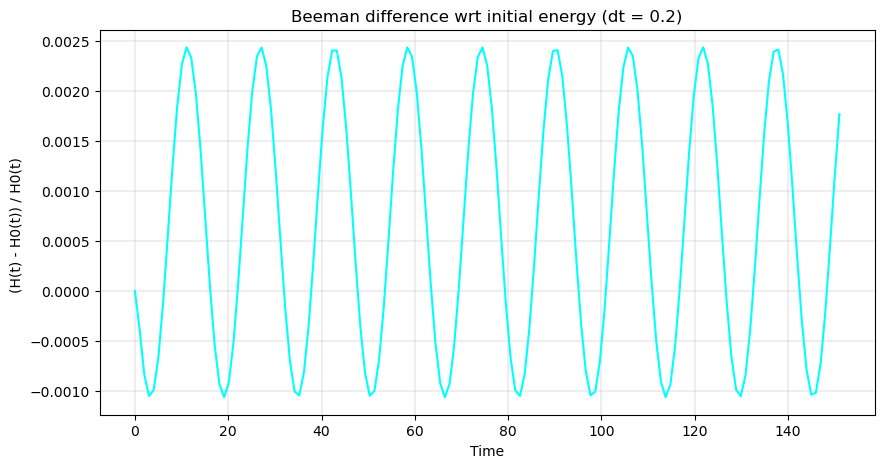

In [81]:
# Plot Beeman energy discrepancy
E_diff_beeman = (E_beeman-E_beeman[0]) / E_beeman[0]
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0,T+1,T+1), E_diff_beeman, color = 'cyan')
plt.title('Beeman difference wrt initial energy (dt = 0.2)')
plt.xlabel('Time')
plt.ylabel('(H(t) - H0(t)) / H0(t) ')
plt.grid(linewidth = 0.3)
plt.show()

1


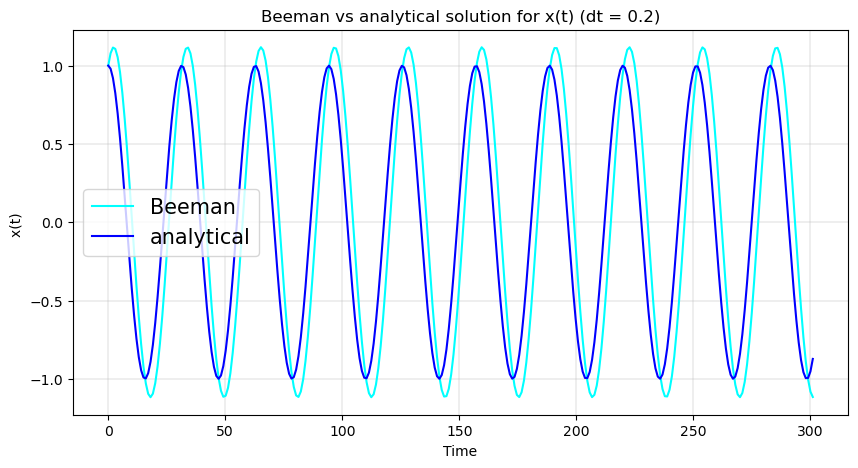

1


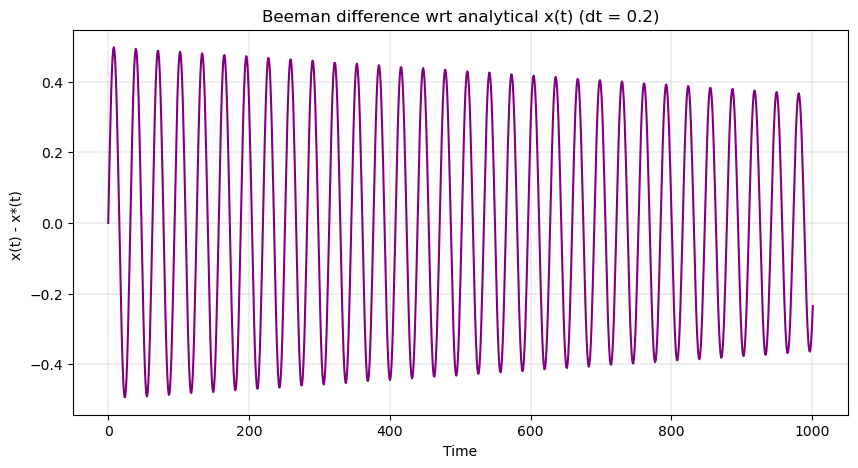

In [112]:
# parameters of the simulation
k = 1
dt = 0.2
T = 300
t = np.linspace(0,T+1,T+1)

# analytical vs beeman
r_analytical  = np.cos(t*dt)
r, v = beeman(1, 0.5, T, dt)

# plot
plt.figure(figsize=(10, 5))
plt.plot(t, r, color = 'cyan',label='Beeman')
plt.plot(t, r_analytical, color = 'blue', label = 'analytical')
plt.title('Beeman vs analytical solution for x(t) (dt = 0.2)')
plt.xlabel('Time')
plt.ylabel('x(t) ')
plt.grid(linewidth = 0.3)
plt.legend(fontsize=15)
plt.show()

# compute the discrepancy
T = 1000
t = np.linspace(0,T+1,T+1)
r_analytical  = np.cos(t*dt)
r, v = beeman(1, 0.5, T, dt)
x_diff_beeman = r - r_analytical

# plot
plt.figure(figsize=(10, 5))
plt.plot(t, x_diff_beeman, color = 'purple')
plt.title('Beeman difference wrt analytical x(t) (dt = 0.2)')
plt.xlabel('Time')
plt.ylabel('x(t) - x*(t) ')
plt.grid(linewidth = 0.3)
plt.show()

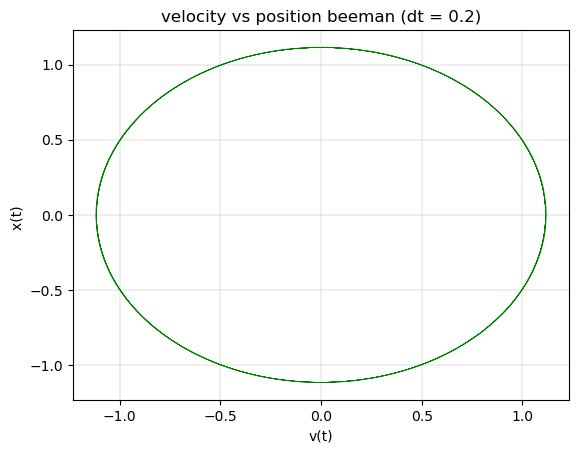

In [118]:
plt.plot(v, r, color = 'green', linewidth = 0.05)
plt.title('velocity vs position beeman (dt = 0.2)')
plt.xlabel('v(t)')
plt.ylabel('x(t) ')
plt.grid(linewidth = 0.3)
plt.show()

##### Velocity verlet

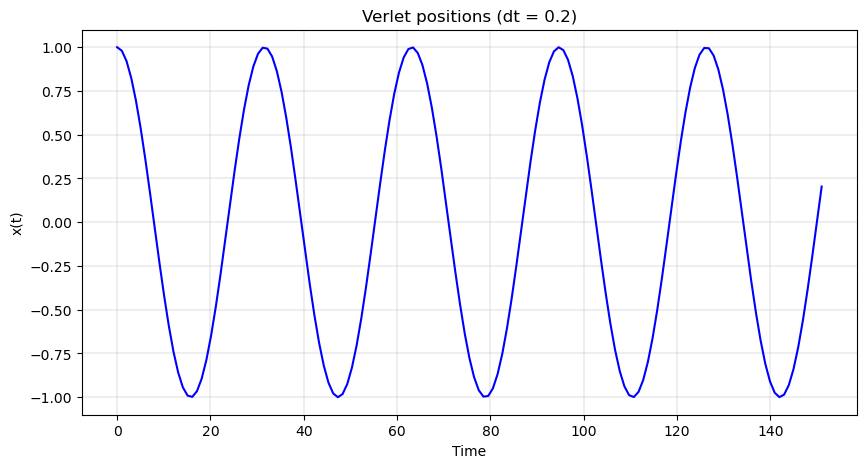

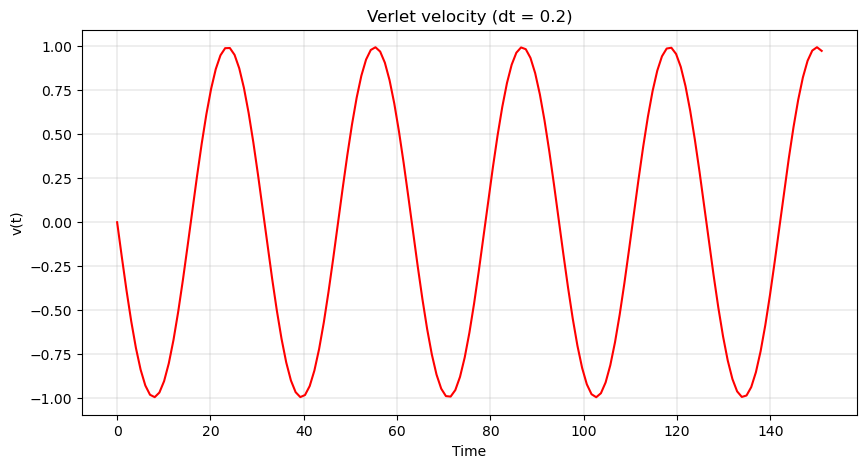

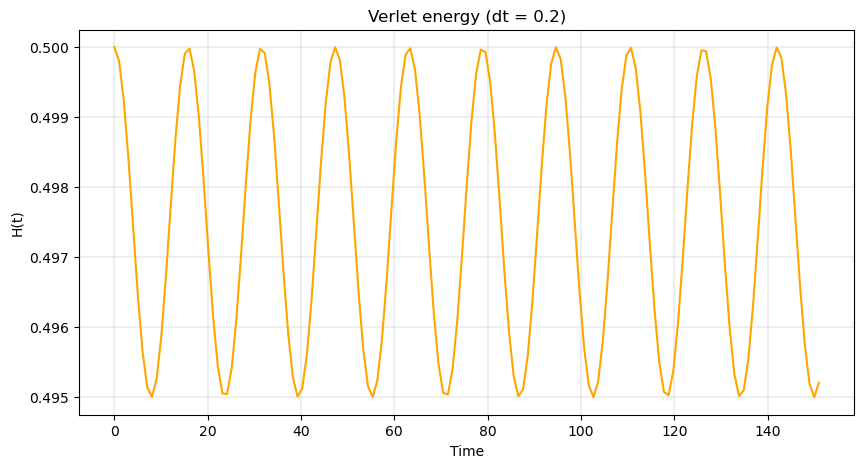

In [134]:
T = 150
r, v = vel_verlet(1,0, T, 0.2)

# Plot Verlet positions
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0,T+1,T+1), r, color = 'blue')
plt.title('Verlet positions (dt = 0.2)')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.grid(linewidth = 0.3)
plt.show()


# Plot Verlet velocity
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0,T+1,T+1), v, color = 'red')
plt.title('Verlet velocity (dt = 0.2)')
plt.xlabel('Time')
plt.ylabel('v(t)')
plt.grid(linewidth = 0.3)
plt.show()
    
    
E_vel_verlet = get_E(r,v,m=1,k=1)
# Plot Verlet energy
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0,T+1,T+1), E_vel_verlet, color = 'orange')
plt.title('Verlet energy (dt = 0.2)')
plt.xlabel('Time')
plt.ylabel('H(t)')
plt.grid(linewidth = 0.3)
plt.show()    

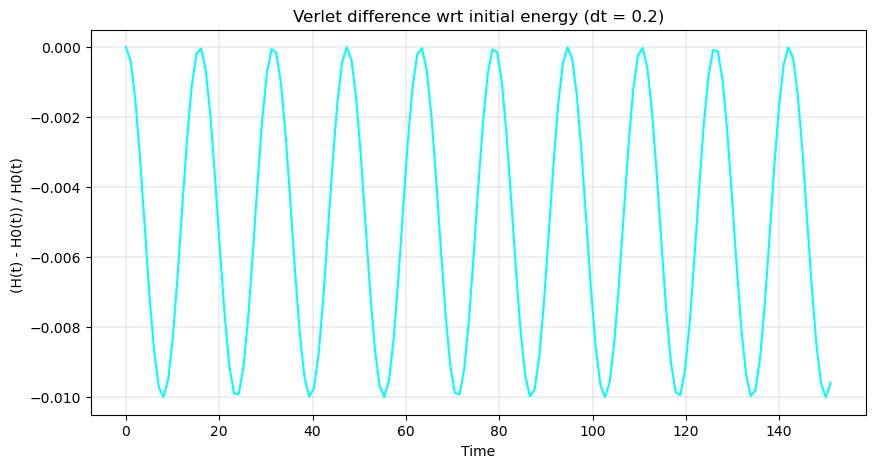

In [126]:
# Plot Verlet energy discrepancy
E_diff_verlet = (E_vel_verlet-E_vel_verlet[0]) / E_vel_verlet[0]
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0,T+1,T+1), E_diff_verlet, color = 'cyan')
plt.title('Verlet difference wrt initial energy (dt = 0.2)')
plt.xlabel('Time')
plt.ylabel('(H(t) - H0(t)) / H0(t) ')
plt.grid(linewidth = 0.3)
plt.show()

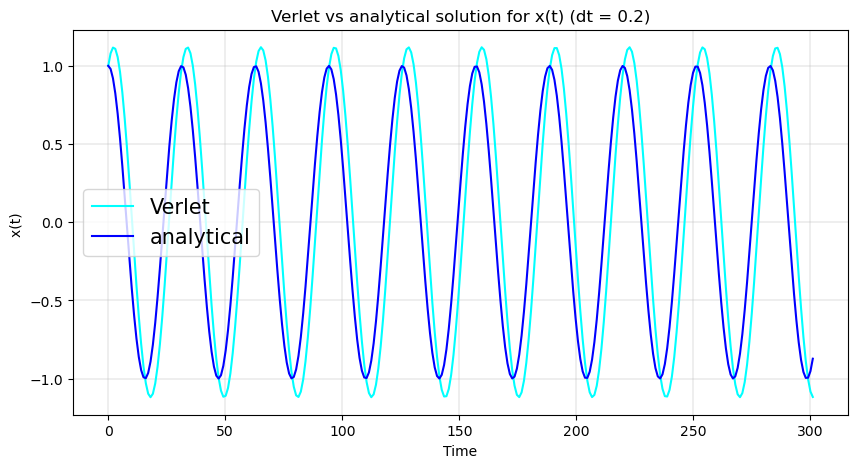

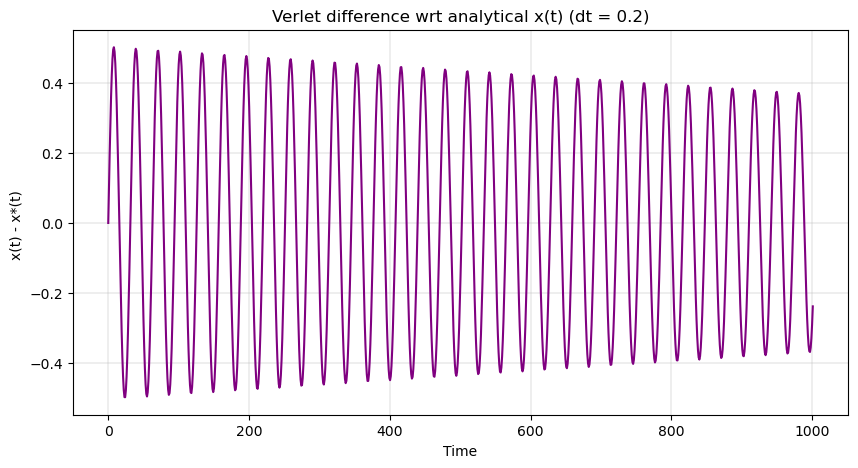

In [127]:
# parameters of the simulation
k = 1
dt = 0.2
T = 300
t = np.linspace(0,T+1,T+1)

# analytical vs verlet
r_analytical  = np.cos(t*dt)
r, v = vel_verlet(1,0.5, T, dt)

# plot
plt.figure(figsize=(10, 5))
plt.plot(t, r, color = 'cyan',label='Verlet')
plt.plot(t, r_analytical, color = 'blue', label = 'analytical')
plt.title('Verlet vs analytical solution for x(t) (dt = 0.2)')
plt.xlabel('Time')
plt.ylabel('x(t) ')
plt.grid(linewidth = 0.3)
plt.legend(fontsize=15)
plt.show()

# compute the discrepancy
T = 1000
t = np.linspace(0,T+1,T+1)
r_analytical  = np.cos(t*dt)
r, v = vel_verlet(1, 0.5, T, dt)
x_diff_verlet = r - r_analytical

# plot
plt.figure(figsize=(10, 5))
plt.plot(t, x_diff_verlet, color = 'purple')
plt.title('Verlet difference wrt analytical x(t) (dt = 0.2)')
plt.xlabel('Time')
plt.ylabel('x(t) - x*(t) ')
plt.grid(linewidth = 0.3)
plt.show()

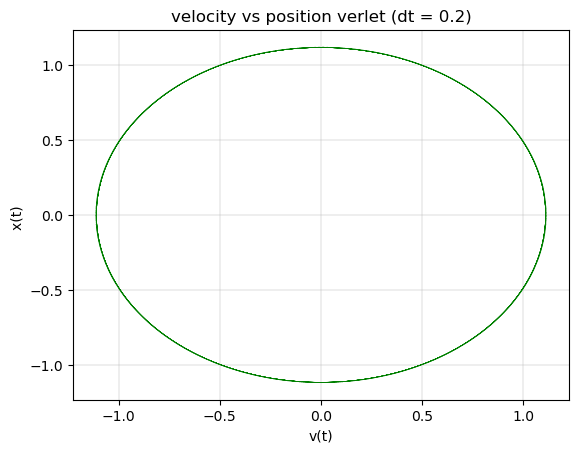

In [128]:
plt.plot(v, r, color = 'green', linewidth = 0.05)
plt.title('velocity vs position verlet (dt = 0.2)')
plt.xlabel('v(t)')
plt.ylabel('x(t) ')
plt.grid(linewidth = 0.3)
plt.show()